<a href="https://colab.research.google.com/github/ArkS0001/HeritageAI-Generating-Cultural-Heritage-Imagery-with-LLMs/blob/main/final_heritage_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text-guided depth-to-image generation

The [StableDiffusionDepth2ImgPipeline](https://huggingface.co/docs/diffusers/main/en/api/pipelines/stable_diffusion/depth2img#diffusers.StableDiffusionDepth2ImgPipeline) lets you pass a text prompt and an initial image to condition the generation of new images. In addition, you can also pass a `depth_map` to preserve the image structure. If no `depth_map` is provided, the pipeline automatically predicts the depth via an integrated [depth-estimation model](https://github.com/isl-org/MiDaS).

Start by creating an instance of the [StableDiffusionDepth2ImgPipeline](https://huggingface.co/docs/diffusers/main/en/api/pipelines/stable_diffusion/depth2img#diffusers.StableDiffusionDepth2ImgPipeline):

In [ ]:
pip install diffusers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 24.2 MB/s eta 0:00:00


In [ ]:
import torch
import requests
from PIL import Image

from diffusers import StableDiffusionDepth2ImgPipeline

pipe = StableDiffusionDepth2ImgPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-depth",
    torch_dtype=torch.float16,
).to("cuda")

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/545 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

scheduler/scheduler_config.json:   0%|          | 0.00/346 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

depth_estimator/config.json:   0%|          | 0.00/9.96k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/732 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/382 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/923 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.07k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/716 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/490M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Now pass your prompt to the pipeline. You can also pass a `negative_prompt` to prevent certain words from guiding how an image is generated:

In [ ]:
url = "http://images.cocodataset.org/val2017/000000039769.jpg"
init_image = Image.open(requests.get(url, stream=True).raw)
prompt = "two tigers"
n_prompt = "bad, deformed, ugly, bad anatomy"
image = pipe(prompt=prompt, image=init_image, negative_prompt=n_prompt, strength=0.7).images[0]
image

In [ ]:
from PIL import Image

# Replace this with the path to your local image file
image_path = "/content/unnamed.jpg"

# Open the image file
init_image = Image.open(image_path).convert("RGB")

# Resize the image to fit within the specified dimensions while maintaining aspect ratio
init_image.thumbnail((768, 768))

# Display the image (if you are in an environment that supports image display)
init_image.show()


  0%|          | 0/50 [00:00<?, ?it/s]

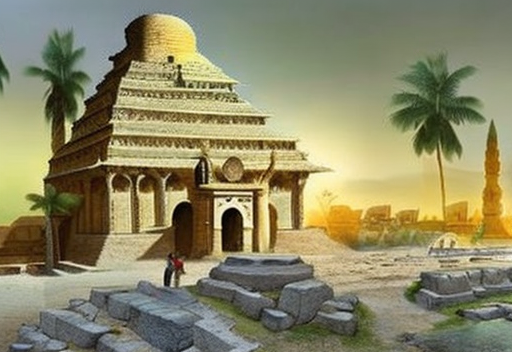

In [ ]:
prompt = "5000 year old city in construction"
n_prompt = "bad, deformed, ugly"
image = pipe(prompt=prompt, image=init_image, negative_prompt=n_prompt, strength=1.0).images[0]
image